In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

# (a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [2]:
#Loading the datasets
_2c = arff.loadarff("../data/column_2C_weka.arff")
df = pd.DataFrame(_2c[0])
_3c = arff.loadarff("../data/column_3C_weka.arff")
df_3c = pd.DataFrame(_3c[0])

In [3]:
#Checking for NULL values
print(df.isna().sum())
df.head(10)

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,b'Abnormal'
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,b'Abnormal'
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,b'Abnormal'
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,b'Abnormal'
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,b'Abnormal'


In [4]:
#Evaluating classes in the two datasets
print(f"{df['class'].value_counts()}")
# print("*" * 40)
# print(f"DF_3C {df_3c['class'].value_counts()}")

b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64


In [5]:
#Replacing NO = 0 and AB = 1.
df['class'] = df["class"].str.decode('utf-8') #removing leading b' from string
df.loc[df['class'] == "Abnormal", "class"] = 1
df.loc[df['class'] == "Normal", "class"] = 0

In [6]:
print(f"{df['class'].value_counts()}")

1    210
0    100
Name: class, dtype: int64


# (b) Pre-Processing and Exploratory data analysis:

## i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

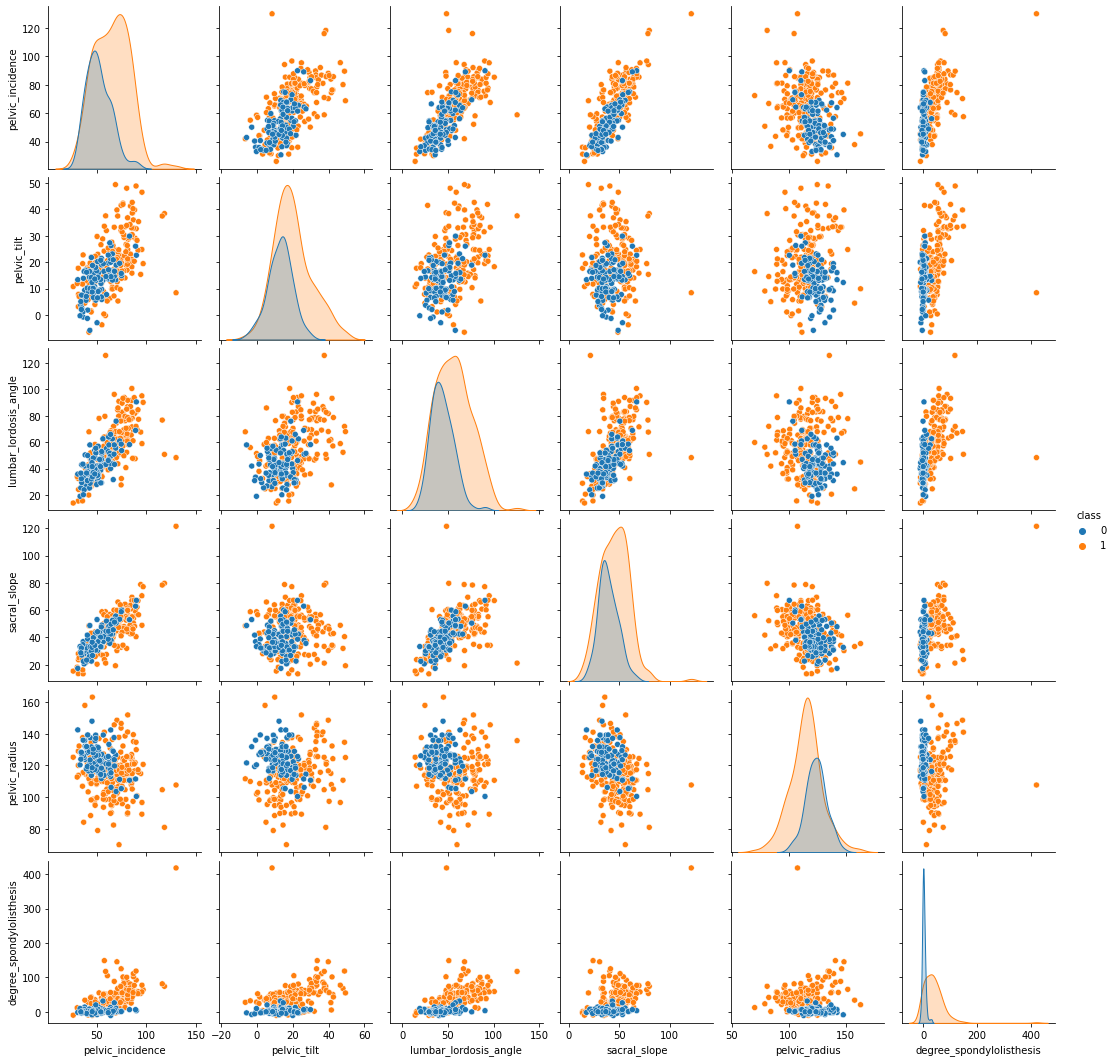

In [7]:
independent_vars = [col for col in df.columns if col != "class"]
sns.pairplot(df, hue ='class')

## ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

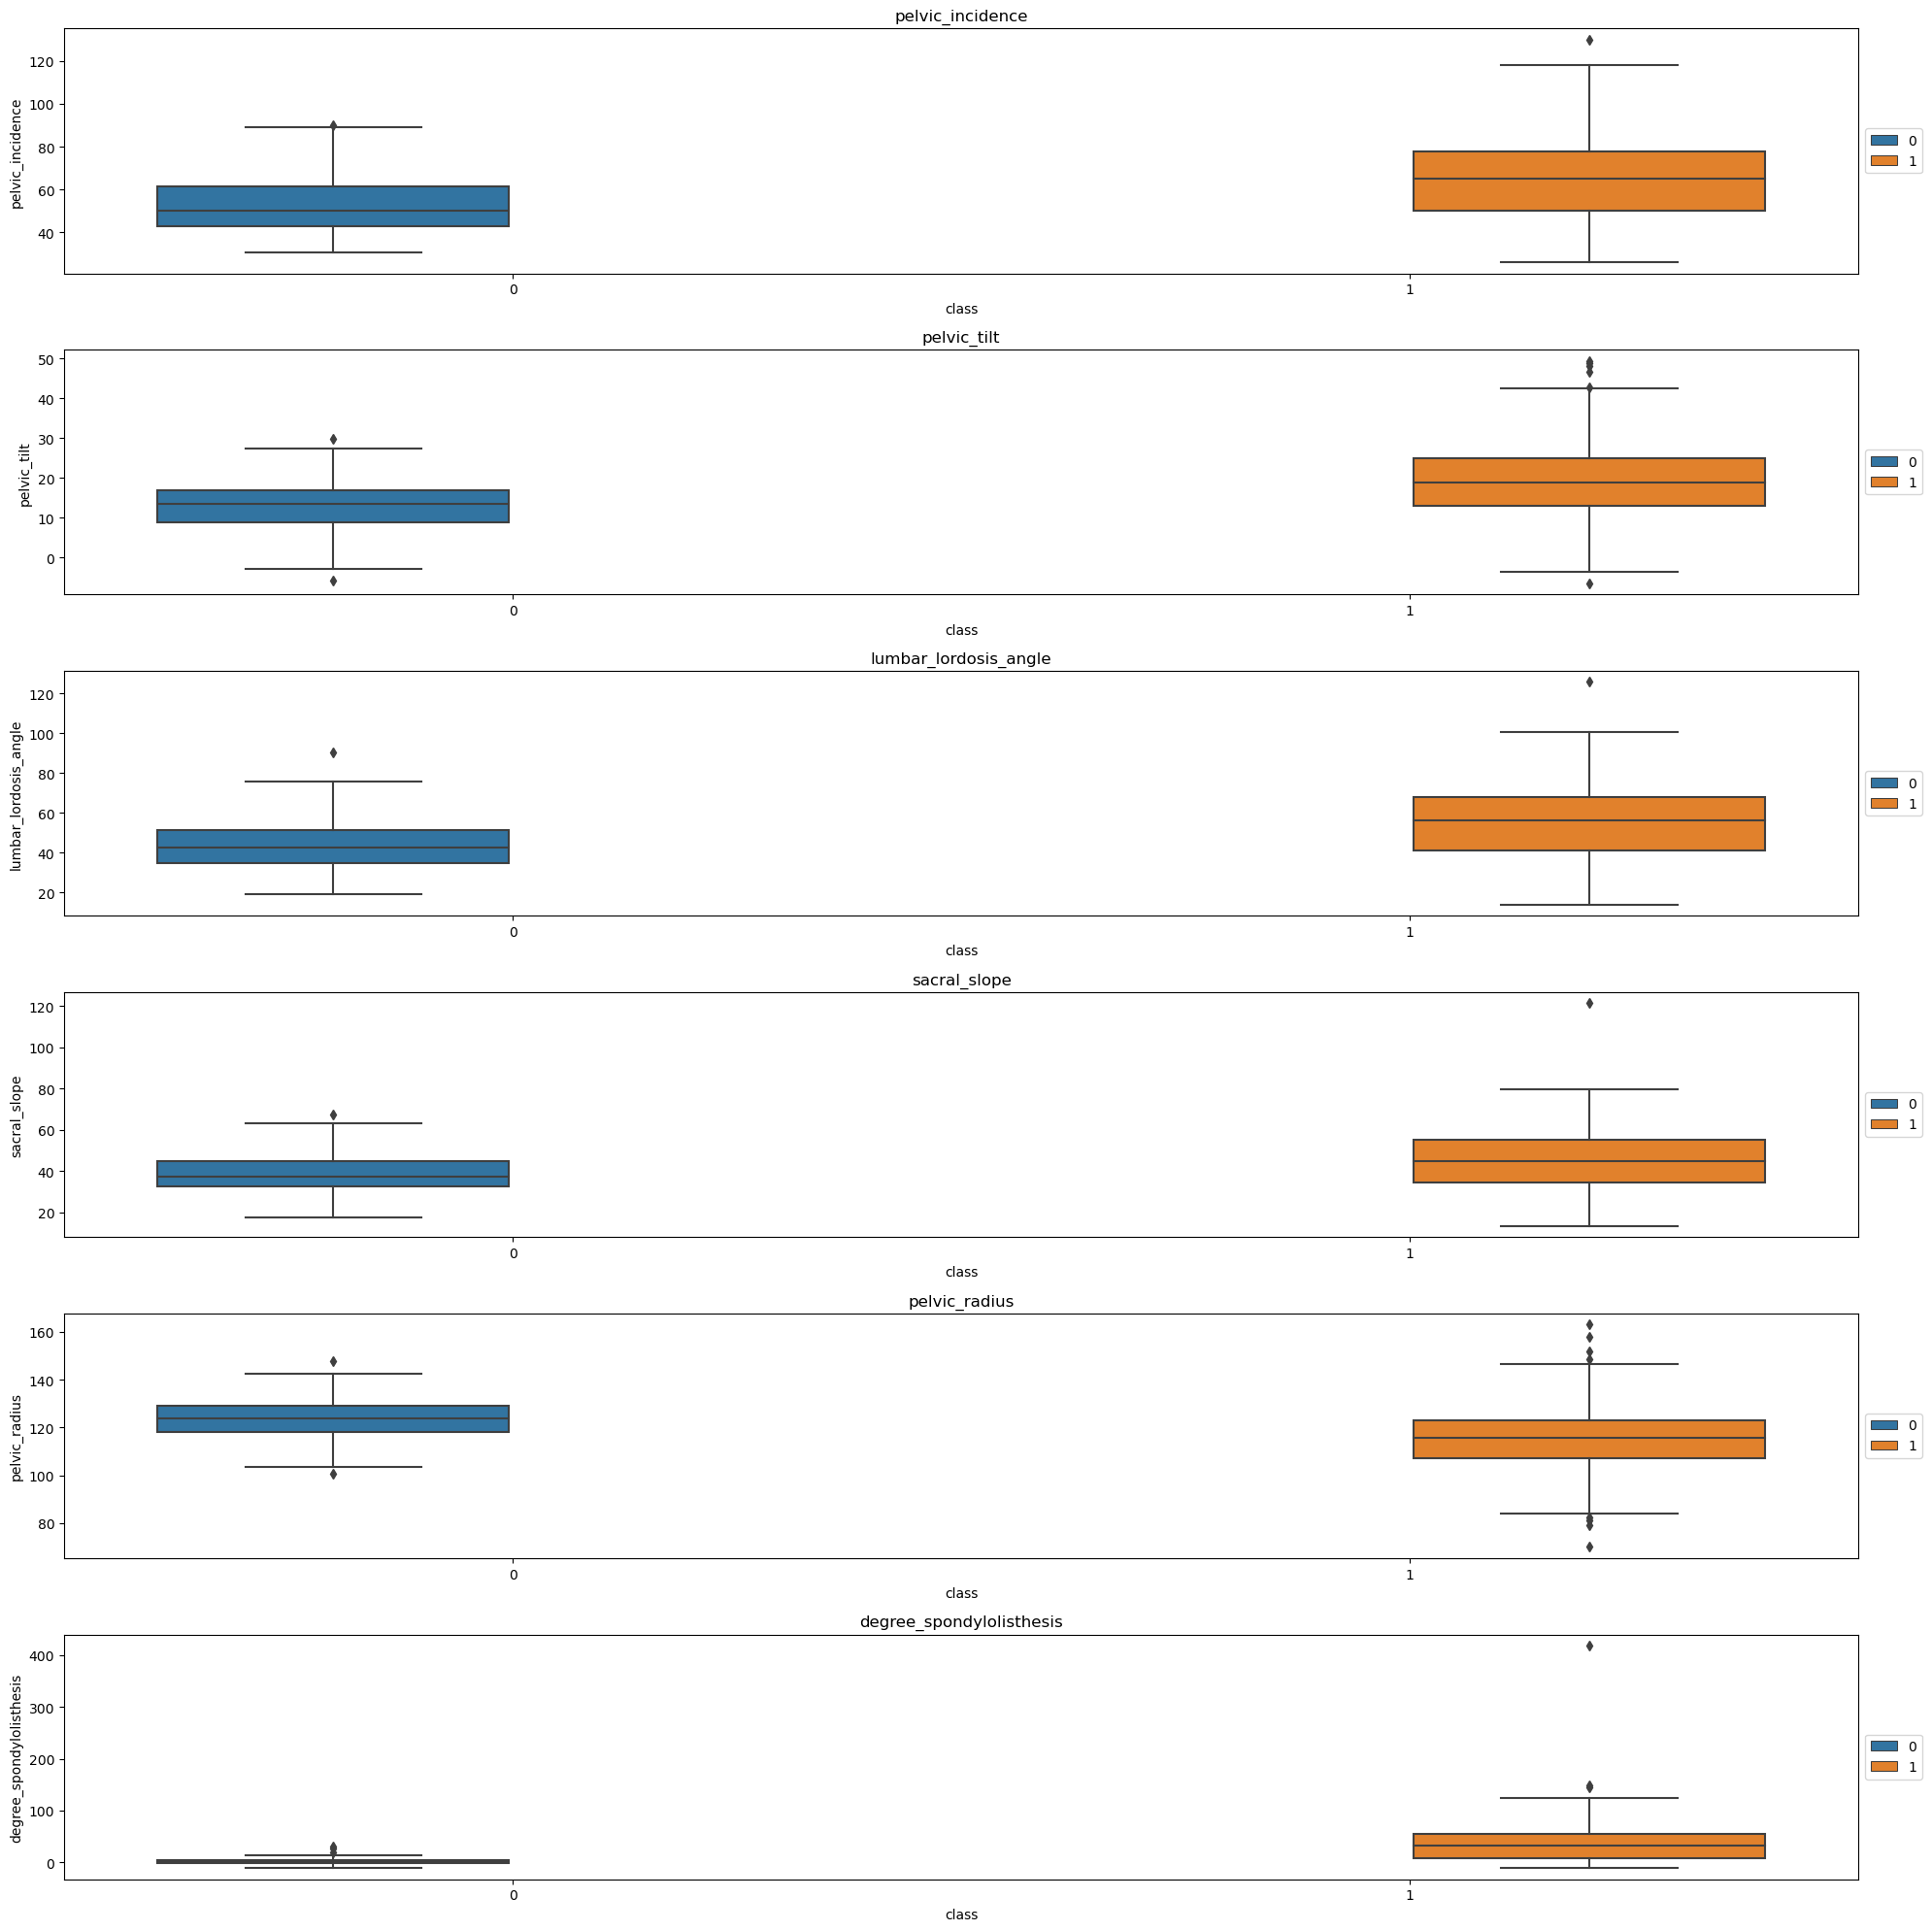

In [8]:
fig, axs = plt.subplots(len(independent_vars),figsize=(20,20))
for i in range(len(independent_vars)):
    axs[i].set_title(f'{independent_vars[i]}')
    sns.boxplot(x='class', y=f'{independent_vars[i]}', data=df, hue='class', ax=axs[i])
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

## iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [9]:
df_groups = df.groupby(by="class")
for key, group in df_groups:
    if key == 0:
        # normal group
        df_normal_train = group.iloc[:70]
        df_normal_test = group.iloc[70:]
    else:
        # abnormal group
        df_abnormal_train = group.iloc[:140]
        df_abnormal_test = group.iloc[140:]

In [10]:
df_train = pd.concat([df_normal_train, df_abnormal_train])
df_test = pd.concat([df_normal_test, df_abnormal_test])
# df_train = shuffle(df_train)
# df_test = shuffle(df_test)
print(f"Train Shape: {df_train.shape} || Test Shape: {df_test.shape}")

Train Shape: (210, 7) || Test Shape: (100, 7)


In [11]:
print(f"Train Value Counts: \n {df_train['class'].value_counts()} \n Test Value Counts: \n {df_test['class'].value_counts()}")


Train Value Counts: 
 1    140
0     70
Name: class, dtype: int64 
 Test Value Counts: 
 1    70
0    30
Name: class, dtype: int64


In [12]:
X_train, y_train = df_train.iloc[:, 0:-1], df_train.iloc[:, -1]
X_test, y_test = df_test.iloc[:,0:-1], df_test.iloc[:,-1]
#y needs to converted from object to int for KNN classifier to work properly
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# (c) Classification using KNN on Vertebral Column Data Set

## i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [13]:
cls = KNeighborsClassifier(n_neighbors=1, metric='euclidean', n_jobs=-1)

## ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [14]:
x_axis = [num for num in range(208, -1, -3)]
train_scores = []
test_scores = []
min_k, min_error = float("inf"), float("inf")

for k in range(208, -1, -3):
    cls = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1)
    cls.fit(X_train, y_train)
    y_pred_train = cls.predict(X_train)
    train_error = 1 - metrics.accuracy_score(y_train, y_pred_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    train_scores.append(train_error)
    test_scores.append(test_error)
    if test_error < min_error:
        min_error = test_error
        min_k = k
#     train_test_scores[k] = [train_error, test_error]

print(len(train_scores) == len(test_scores) == len(x_axis))
print(f"Optimal Value of K={min_k} and lowest test error obtained={min_error}")

True
Optimal Value of K=4 and lowest test error obtained=0.06000000000000005


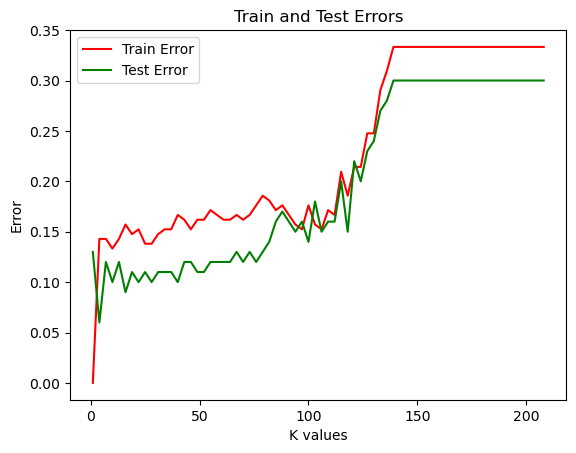

In [15]:
plt.plot(x_axis, train_scores, color='r', label='Train Error')
plt.plot(x_axis, test_scores, color='g', label='Test Error')
plt.xlabel("K values")
plt.ylabel("Error")
plt.title("Train and Test Errors")
plt.legend()

In [16]:
cls_euclid = KNeighborsClassifier(n_neighbors=min_k, metric='euclidean', n_jobs=-1)
cls_euclid.fit(X_train, y_train)
y_hat_euclid = cls_euclid.predict(X_test)
#POS = 1, NEG = 0
print(f"Confusion Matrix = \n {metrics.confusion_matrix(y_test, y_hat_euclid)}")
tp, tn, fp, fn = 0, 0, 0, 0
y_test_array = y_test.values.flatten()
y_hat_array = y_hat_euclid.flatten()
for i in range(len(y_hat_array)):
    actual = y_test_array[i]
    pred = y_hat_array[i]
    if actual == 1 and pred == 1:
        tp += 1
    elif actual == 0 and pred == 0:
        tn += 1
    elif actual == 0 and pred == 1:
        fp += 1
    elif actual == 1 and pred == 0:
        fn += 1
print(f"TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}")
# tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat_euclid).ravel()
total = tn + fp +  fn + tp
precision, recall = tp/(tp + fp), tp/(tp + fn)
print(f"True Positive Rate = {tp/(tp + fn)}")
print(f"True Negative Rate = {tn/(fp + tn)}")
print(f"Precision Score = {precision}")
print(f"Recall Score = {recall}")
print(f"F1 Score = {2 * (precision * recall) / (precision + recall)}")

Confusion Matrix = 
 [[25  5]
 [ 1 69]]
TN = 25, FP = 5, FN = 1, TP = 69
True Positive Rate = 0.9857142857142858
True Negative Rate = 0.8333333333333334
Precision Score = 0.9324324324324325
Recall Score = 0.9857142857142858
F1 Score = 0.9583333333333333


## iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.


Sample Train Set Shape = (10, 7)
Sample Train Set Shape = (20, 7)
Sample Train Set Shape = (30, 7)
Sample Train Set Shape = (40, 7)
Sample Train Set Shape = (50, 7)
Sample Train Set Shape = (60, 7)
Sample Train Set Shape = (70, 7)
Sample Train Set Shape = (80, 7)
Sample Train Set Shape = (90, 7)
Sample Train Set Shape = (100, 7)
Sample Train Set Shape = (110, 7)
Sample Train Set Shape = (120, 7)
Sample Train Set Shape = (130, 7)
Sample Train Set Shape = (140, 7)
Sample Train Set Shape = (150, 7)
Sample Train Set Shape = (160, 7)
Sample Train Set Shape = (170, 7)
Sample Train Set Shape = (180, 7)
Sample Train Set Shape = (190, 7)
Sample Train Set Shape = (200, 7)
Sample Train Set Shape = (210, 7)
Minimum Test Error: 0.07999999999999996


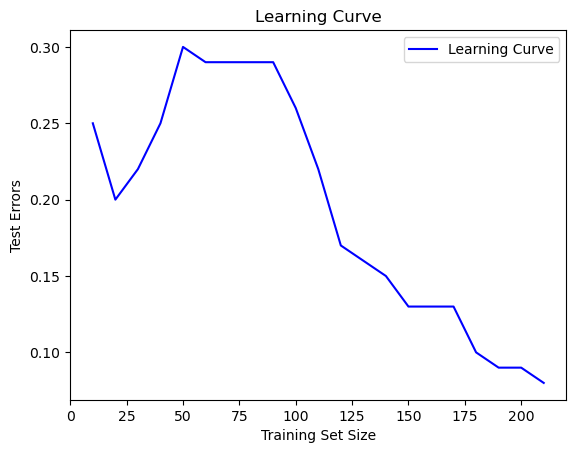

In [17]:
training_vals = [N for N in range(10,220,10)]
test_errors = []
for N in range(10,220,10):
    norm_num_rows = math.floor(N / 3)
    abnorm_num_rows = N - norm_num_rows

    df_groups = df_train.groupby(by="class")
    for key, group in df_groups:
        if key == 0:
            # normal group
            df_normal_train = group.iloc[:norm_num_rows]
        elif key == 1:
            # abnormal group
            df_abnormal_train = group.iloc[:abnorm_num_rows]
    df_sample = pd.concat([df_normal_train, df_abnormal_train])
#     df_sample = shuffle(df_sample)
    print(f"Sample Train Set Shape = {df_sample.shape}")

    X_sample_train, y_sample_train = df_sample.iloc[:, 0:-1], df_sample.iloc[:, -1]
#     X_sample_train = scaler.transform(X_sample_train)
    y_sample_train = y_sample_train.astype('int')
        
    min_k, min_error = float("inf"), float("inf")
    for k in range(1, N, 5):
        cls = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1)
        cls.fit(X_sample_train, y_sample_train)
        y_hat = cls.predict(X_test)
        test_error = 1 - metrics.accuracy_score(y_test,y_hat)
        if test_error < min_error:
            min_error = test_error
            min_k = k
    test_errors.append(min_error)

print(f"Minimum Test Error: {min(test_errors)}")
plt.plot(training_vals, test_errors, color='b', label='Learning Curve')
plt.xlabel("Training Set Size")
plt.ylabel("Test Errors")
plt.title("Learning Curve")
plt.legend()

# (d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

In [18]:
df_rows = []

## i. Minkowski Distance: A. which becomes Manhattan Distance with p = 1.

In [19]:
min_k_man, min_error_man = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1, n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_man:
        min_error_man = test_error
        min_k_man = k
print(f"Minkowski with p=1 (Manhattan): \n K = K* = {min_k_man} \n Best Test Error = {min_error_man}")
df_rows.append(["Minkowski (p=1) Manhattan", min_k_man, min_error_man])

Minkowski with p=1 (Manhattan): 
 K = K* = 1 
 Best Test Error = 0.10999999999999999


## i. Minkowski Distance: B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [20]:
min_k_mink, min_error_mink, bestlogp = float("inf"), float("inf"), None
for logp in np.arange(0.1,1.1,0.1):
    p = pow(10,logp)
    cls = KNeighborsClassifier(n_neighbors=min_k_man, metric='minkowski',p=p, n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_mink:
        min_error_mink = test_error
        min_k_mink = k
        bestlogp = logp
print(f"Minkowski Distance: \n K = K* = {min_k_mink} \n Best Test Error = {min_error_mink} \n Best Log(p) = {bestlogp}")
df_rows.append(["Minkowski Distance", min_k_mink, min_error_mink])

Minkowski Distance: 
 K = K* = 196 
 Best Test Error = 0.10999999999999999 
 Best Log(p) = 0.7000000000000001


## i. Minkowski Distance: C. which becomes Chebyshev Distance with p → ∞

In [21]:
min_k_cheb, min_error_cheb = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=float('inf'), n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_cheb:
        min_error_cheb = test_error
        min_k_cheb = k
print(f"Minkowski with p=inf (Chebyshev): \n K = K* = {min_k_cheb} \n Best Test Error = {min_error_cheb}")
df_rows.append(["Minkowski (p=∞) Chebyshev", min_k_cheb, min_error_cheb])

Minkowski with p=inf (Chebyshev): 
 K = K* = 16 
 Best Test Error = 0.07999999999999996


## ii. Mahalanobis Distance.

In [22]:
min_k_mahal, min_error_mahal = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'VI': np.linalg.inv(np.cov(X_train.T))}, n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_mahal:
        min_error_mahal = test_error
        min_k_mahal = k
print(f"Mahalanobis Distance: \n K = K* = {min_k_mahal} \n Best Test Error = {min_error_mahal}")
df_rows.append(["Mahalanobis Distance", min_k_mahal, min_error_mahal])

Mahalanobis Distance: 
 K = K* = 1 
 Best Test Error = 0.16000000000000003


In [23]:
df_display = pd.DataFrame(df_rows, columns=['Metric', 'K=K*', 'Best Test Error'])
df_display

,Metric,K=K*,Best Test Error
0,Minkowski (p=1) Manhattan,1,0.11
1,Minkowski Distance,196,0.11
2,Minkowski (p=∞) Chebyshev,16,0.08
3,Mahalanobis Distance,1,0.16


# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [24]:
min_k_euc_weighted, min_error_euc_weighted = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_euc_weighted:
        min_error_euc_weighted = test_error
        min_k_euc_weighted = k
print(f"Weighted KNN Classifier - Euclidean: K=K* {min_k_euc_weighted}, Best Test Error = {min_error_euc_weighted} \n")

min_k_man_weighted, min_error_man_weighted = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=1, n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_man_weighted:
        min_error_man_weighted = test_error
        min_k_man_weighted = k
print(f"Weighted KNN Classifier - Manhattan: K=K* {min_k_man_weighted}, Best Test Error = {min_error_man_weighted} \n")

min_k_cheb_weighted, min_error_cheb_weighted = float("inf"), float("inf")
for k in range(1, 200, 5):
    cls = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=float('inf'), n_jobs=-1)
    cls.fit(X_train, y_train)
    y_hat = cls.predict(X_test)
    test_error = 1 - metrics.accuracy_score(y_test,y_hat)
    if test_error < min_error_cheb_weighted:
        min_error_cheb_weighted = test_error
        min_k_cheb_weighted = k
print(f"Weighted KNN Classifier - Chebyshev: K=K* {min_k_cheb_weighted}, Best Test Error = {min_error_cheb_weighted} \n")


Weighted KNN Classifier - Euclidean: K=K* 6, Best Test Error = 0.09999999999999998 

Weighted KNN Classifier - Manhattan: K=K* 26, Best Test Error = 0.09999999999999998 

Weighted KNN Classifier - Chebyshev: K=K* 16, Best Test Error = 0.10999999999999999 



# (f) What is the lowest training error rate you achieved in this homework?

In [25]:
print(f"Lowest Training Error achieved in KNN = {min(train_scores)}")

Lowest Training Error achieved in KNN = 0.0
